Dans ce travail, Nous avons développé un modèle basé sur le Modèle SVM(Support Vector Machine) capable de prédire le cas de syndrome métabolique en matière de la crise cardiaque. Nous avons aussi exploré les données de cette étude existante pour en  illustrer la description des résultats des corrélations.

Notre modèle est un outil qui optimise dans le cadre de la rapidité, la fiabilité, et la performance de l’automatisme de prédiction des nouveaux cas des diabétiques.

Le système que nous avons mis en place a  une immense importance dans un cadre aussi préventif pour le corps médical dans le sens où il permet aux médecins d’avoir du coup une idée suspecte  sur l’état sanitaire du nouveau patient pour les maladies métaboliques particulièrement le diabète dans le cadre de notre travail.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.metrics import confusion_matrix

# IMPORTATION DES DONNEES

In [260]:
data= pd.read_csv('diabetes.csv')
bd = data.copy()
#pd.set_option('display.max_row', 13)
#pd.set_option('display.max_columns', 13)
bd=bd.dropna()
bd

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# EXPLORATION DES DONNEES

## Analyse de Forme

In [295]:
bd.shape

(768, 9)

In [296]:
bd.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Analyse de Fond

In [297]:
bd['Outcome'].value_counts(normalize=True)

0    0.540365
1    0.459635
Name: Outcome, dtype: float64

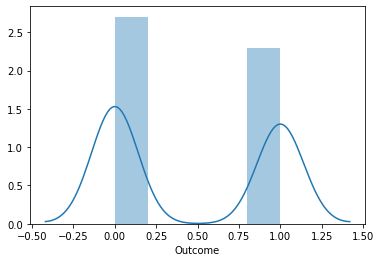

In [65]:
sns.distplot(bd['Outcome'])

In [298]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


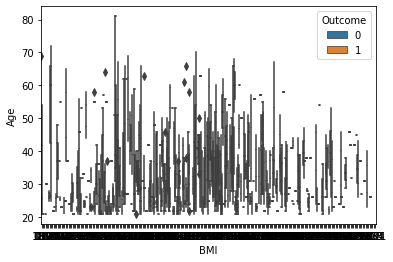

In [300]:
sns.boxplot(x='BMI', y='Age', hue = 'Outcome', data=data)

In [307]:
pd.crosstab(bd['Outcome'], bd['Glucose'])

Glucose,0,44,56,57,61,62,...,194,195,196,197,198,199
Outcome,,,,,,,,,,,,,
0,4,1,1,2,1,1,...,1,0,0,0,0,0
1,1,0,0,0,0,0,...,2,2,3,4,1,1


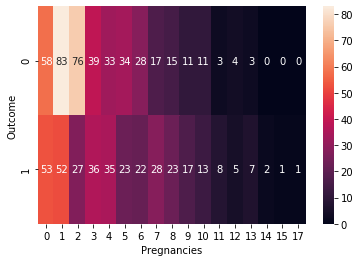

In [303]:
for col in bd[['Pregnancies']]:
    plt.figure()
    sns.heatmap(pd.crosstab(bd['Outcome'], bd[col]), annot=True, fmt='d')

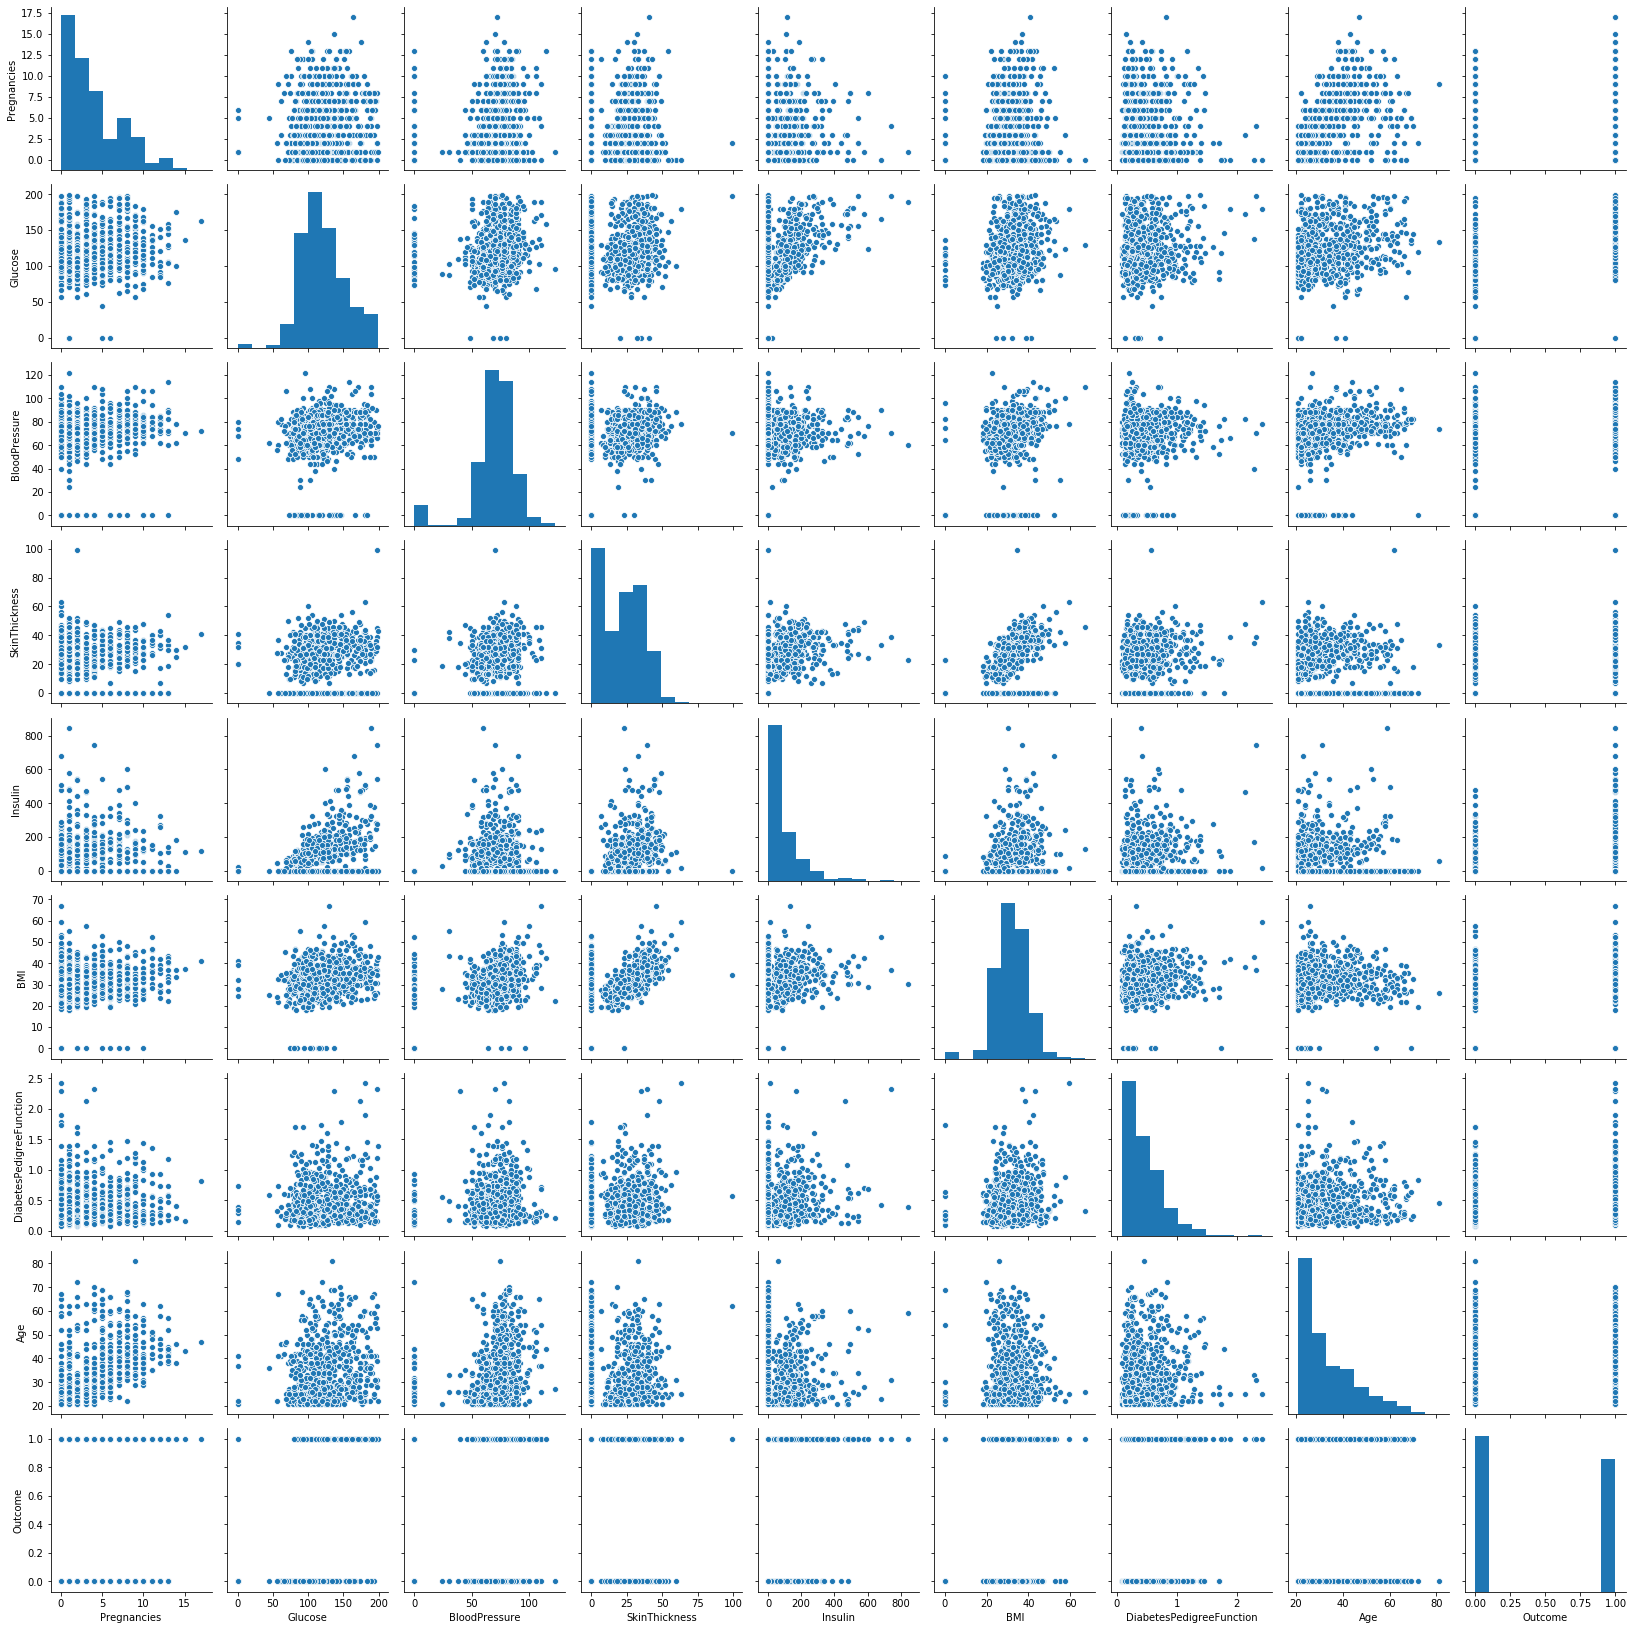

In [304]:
sns.pairplot(data)

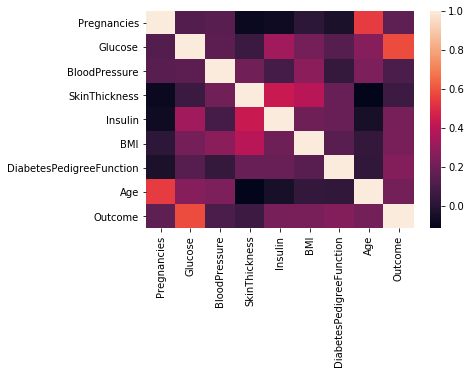

In [305]:
sns.heatmap(bd.corr())

In [151]:
bd

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [286]:
data=bd[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']]

In [287]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# PRETRAITEMENT DES DONNEES

In [288]:
trainset, testset = train_test_split(data, test_size=0.2, random_state = 0)

In [289]:
trainset['Outcome'].value_counts()

0    322
1    292
Name: Outcome, dtype: int64

In [290]:
testset['Outcome'].value_counts()

0    93
1    61
Name: Outcome, dtype: int64

In [291]:
def imputation(data):
    return bd.dropna(axis=0)

def preprocessing(data):
    
    data = imputation(data)
    
    X = data.drop('Outcome', axis=1)
    y = data['Outcome']
    
    print(y.value_counts())
    return X,y

In [292]:
X_train, y_train = preprocessing(trainset)

0    415
1    353
Name: Outcome, dtype: int64


In [293]:
X_test, y_test = preprocessing(testset)

0    415
1    353
Name: Outcome, dtype: int64


# Entrainement du modèle

In [294]:
model = SVC(random_state=0)

model.fit(X_train, y_train)
print('Train score :', model.score(X_train, y_train))
print('Test score :', model.score(X_test, y_test))
model.predict(X_test)

confusion_matrix(y_test, model.predict(X_test))

Train score : 0.8020833333333334
Test score : 0.8020833333333334


array([[356,  59],
       [ 93, 260]], dtype=int64)

In [16]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150,78,29,126,35.2,0.692,54
118,4,97,60,23,0,28.2,0.443,22
247,0,165,90,33,680,52.3,0.427,23
157,1,109,56,21,135,25.2,0.833,23
468,8,120,0,0,0,30.0,0.183,38
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
192,7,159,66,0,0,30.4,0.383,36
629,4,94,65,22,0,24.7,0.148,21
559,11,85,74,0,0,30.1,0.300,35


In [308]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [311]:
def diabete(Pregnancies=6, Glucose=148, BloodPressure=72,
            SkinThickness=35, Insulin=0, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50) :
    x= np.array([Pregnancies, Glucose, BloodPressure,
                 SkinThickness,Insulin, BMI, DiabetesPedigreeFunction, Age]).reshape(1,8)
    print(model.predict(x))

In [319]:
def diabete(model, Pregnancies, Glucose, BloodPressure,
            SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age) :
    x= np.array([Pregnancies, Glucose, BloodPressure,
                 SkinThickness,Insulin, BMI, DiabetesPedigreeFunction, Age]).reshape(1,8)
    print(model.predict(x))
    if model.predict(x)==[1] :
        print('diabetique')
    elif model.predict(x)==[0]:
        print('Non diabetique')
    else:
        print('valeur non prise en charge')
diabete(model, 6,148,72,35,0,33.6,0.627,50)

[1]
diabetique


In [318]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


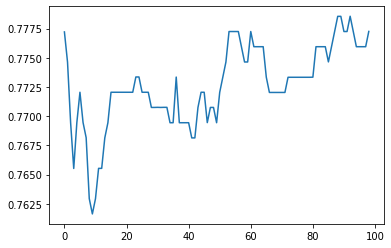

In [320]:
val_score=[]

for k in range(1,100):
    
    score=cross_val_score(SVC(k), X_train, y_train, cv=5, scoring='accuracy').mean()
    val_score.append(score)
    
plt.plot(val_score)

In [18]:
bd

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
